Nous allons utiliser un dataset de patients atteints de cancer du sein.
Ce dataset est nommée
[Breast Cancer Wisconsin ](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original) est contient 609 instances et 9 features.
Vous pouvez importer le dataset en cliquant sur le bouton  IMPORT IN PYTHON


In [1]:
!pip install ucimlrepo
#https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets


In [3]:
X.describe()


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
y.head()


,Class
0,2
1,2
2,2
3,2
4,2


1. Ce dataset contient des valeurs manquantes (non numérique ou NAN). Pour pouvoir travailler avec ces données il faut imputer ces données manquantes par exemples en attribuant la moyenne de features

In [5]:
X = X.fillna(X.mean())


2. Commencer par normalizer les données et les avoir dans la même échelle

In [6]:
Xn = (X - X.min()) / (X.max() - X.min())


3. Trouver les deux premières composantes principales du jeu de données, combien de variances elles expliquent?

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Xn)

print('Variance expliquée', pca.explained_variance_ratio_)


Variance expliquée [0.68897023 0.07271567]


4. Ploter les données en fonction de deux premières composantes. Que remarquez-vous? Le problème est linearment séparable?

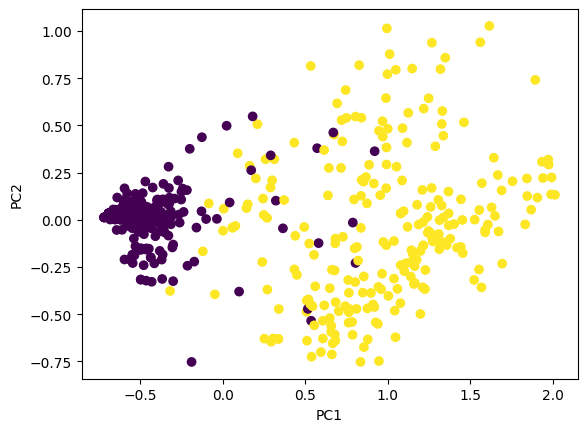

In [8]:
fig, ax = plt.subplots()

Xt = pca.transform(Xn)

ax.scatter(Xt[:, 0], Xt[:, 1], c=y['Class'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');


Les deux classes sont assez bien séparées dans l'espace avec deux composantes. Elles sont linéairement séparables, bien qu'imparfaitement.

5. Regrouper vos données (avec PCA - 2 features) et (original - 9 features) à l'aide de l'algorithme K-means.
Quel est le meilleur choix pour K? Afficher l'inertie et le v_measure_score.

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KMeans(random_state=0), param_grid={'n_clusters': range(1, 10)}, scoring='v_measure_score')
grid.fit(Xn, y['Class']);

print('Données avec 9 features')
print('=======================')
print('Nombre optimal de clusters', grid.best_estimator_.n_clusters)
print('V measure score', grid.best_score_)
print('Inertie', grid.best_estimator_.inertia_)


Données avec 9 features
Nombre optimal de clusters 2
V measure score 0.7665725841725585
Inertie 243.15441925088794


In [10]:
grid = GridSearchCV(KMeans(random_state=0), param_grid={'n_clusters': range(1, 10)}, scoring='v_measure_score')
grid.fit(Xt, y['Class']);

print('Données avec 2 features')
print('=======================')
print('Nombre optimal de clusters', grid.best_estimator_.n_clusters)
print('V measure score', grid.best_score_)
print('Inertie', grid.best_estimator_.inertia_)


Données avec 2 features
Nombre optimal de clusters 2
V measure score 0.7665725841725585
Inertie 98.97979484388114


6. Ploiter les données et les centroïdes (en rouge)

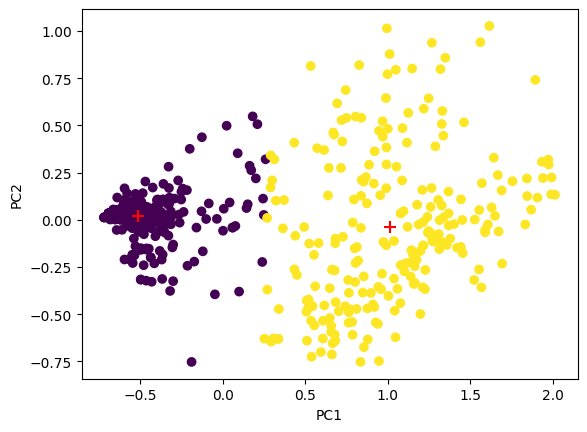

In [11]:
fig, ax = plt.subplots()

ax.scatter(Xt[:, 0], Xt[:, 1], c=grid.best_estimator_.predict(Xt))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

for centroid in grid.best_estimator_.cluster_centers_:
  ax.scatter(centroid[0], centroid[1], s=80, c='r', marker='+')


7. Regrouper les données en utilisant l'algorithme de clustering hiérarchique (AgglomerativeClustering). Tester plusieur valeur pour le paramètre distance_thresholdet afficher le meiller v_measure_score. Vou pouvez aussi visualiser le dendrogramme à l'aide de la fonction plot_dendrogram (ci-dessous).

In [12]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score

best_ac = None
best_distance_threshold = None
best_score = -np.inf

for distance_threshold in np.linspace(0, 20, 21):
  ac = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
  y_pred = ac.fit_predict(Xt)

  score = v_measure_score(y['Class'], y_pred)

  if score > best_score:
    best_score = score
    best_ac = ac
    best_distance_threshold = distance_threshold

print('Meilleur V measure score', best_score)
print('Meilleure distance threshold', best_distance_threshold)


Meilleur V measure score 0.7044529796654716
Meilleure distance threshold 9.0


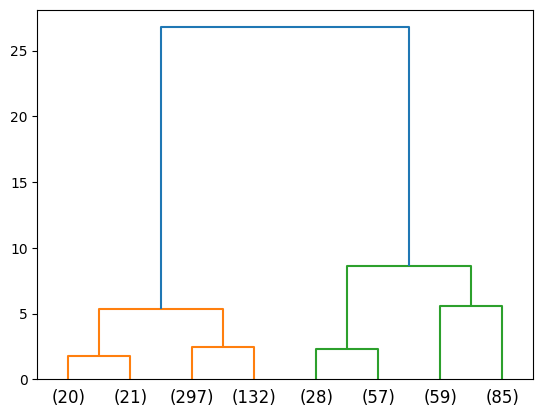

In [13]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(best_ac, truncate_mode='level', p=2)


8. Regrouper les données en utilisant l'algorithme de clustering DBScan. Tester plusieurs valeurs pour le paramètre distance_thresholdet et afficher le meiller v_measure_score

Meilleur V measure score 0.7611331071832416
Meilleure distance threshold 0.1090909090909091


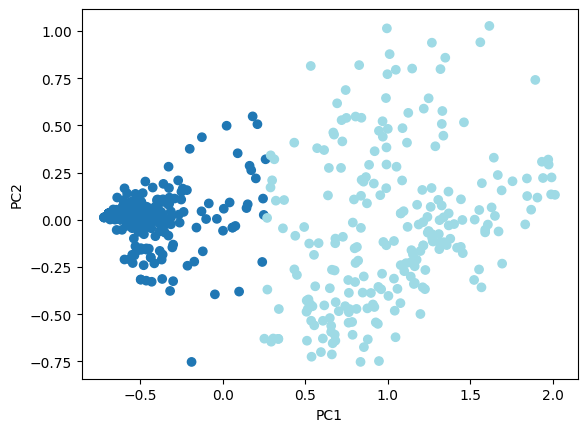

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score

epss = np.linspace(0.1, 1.0, 100)
scores = np.empty(epss.shape)

for index, eps in enumerate(epss):
  model = DBSCAN(eps=eps, min_samples=20)
  y_pred = model.fit_predict(Xt)

  scores[index] = v_measure_score(y['Class'], y_pred)

model_eps = epss[np.argmax(scores)]

print('Meilleur V measure score', np.max(scores))
print('Meilleure distance threshold', model_eps)

model = DBSCAN(eps=model_eps, min_samples=20)
y_pred = grid.best_estimator_.fit_predict(Xt)

fig, ax = plt.subplots()

ax.scatter(Xt[:, 0], Xt[:, 1], c=y_pred, cmap='tab20')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');


9. Quelle est votre conclusion? Est-ce que le PCA peut vous aider à trouver de meilleurs résultats? Ou faciliter la visualisation? Quel est le meilleur algorithme de clustering? Quelle est la classe la plus difficile à regrouper?

La PCA ne fait que retirer de l'information et n'aide donc pas l'apprentissage directement. Elle peut néanmoins permettre d'aider la visualisation en se limitant à deux ou trois composantes, et permet de travailler avec des données de taille réduite.

Les différents algorithmes permettent de traiter des problèmes différents ; ici c'est K-means qui donne le meilleur résultat. La classe la plus difficile à regrouper est la classe de droite (PC1 > 0) car les points sont plus éloignés et l'algorithme DBSCAN a donc tendance à y créer plusieurs clusters.